In [122]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Step 1 : Reading & understanding the data

In [59]:

## Loading the day.csv dataset
## Reading the csv data set and store it into a dataframe

bike=pd.read_csv('day.csv')   # The csv file should be in the same directory as that of python notebook
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [60]:
# looking at total no of rows and columns
bike.shape

(730, 16)

In [61]:
# Checking the data types and checking of null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### There are no null values in the data , if there had been we'd need to treat the data.

In [62]:
#Analyzing numerical values for basic attributes like mean , min max etc
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Analysing continous variables

<Figure size 1440x864 with 0 Axes>

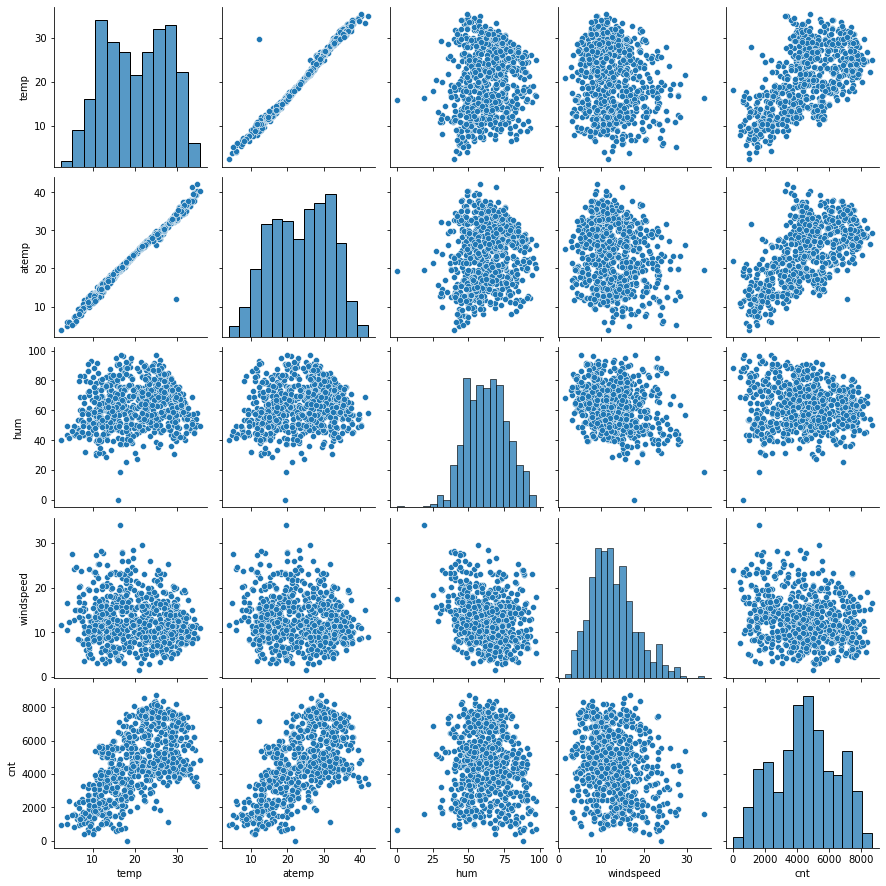

In [63]:
# Plotting continous variables to see the relationship among themselves and with cnt

plt.figure(figsize=(20,12))
sns.pairplot(bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

We observe that temp & atemp have a very high linear relationship with cnt\
Also, temp & atemp are highly correlated with each other, we will need to drop one of them later.

# Analyzing categorical variables

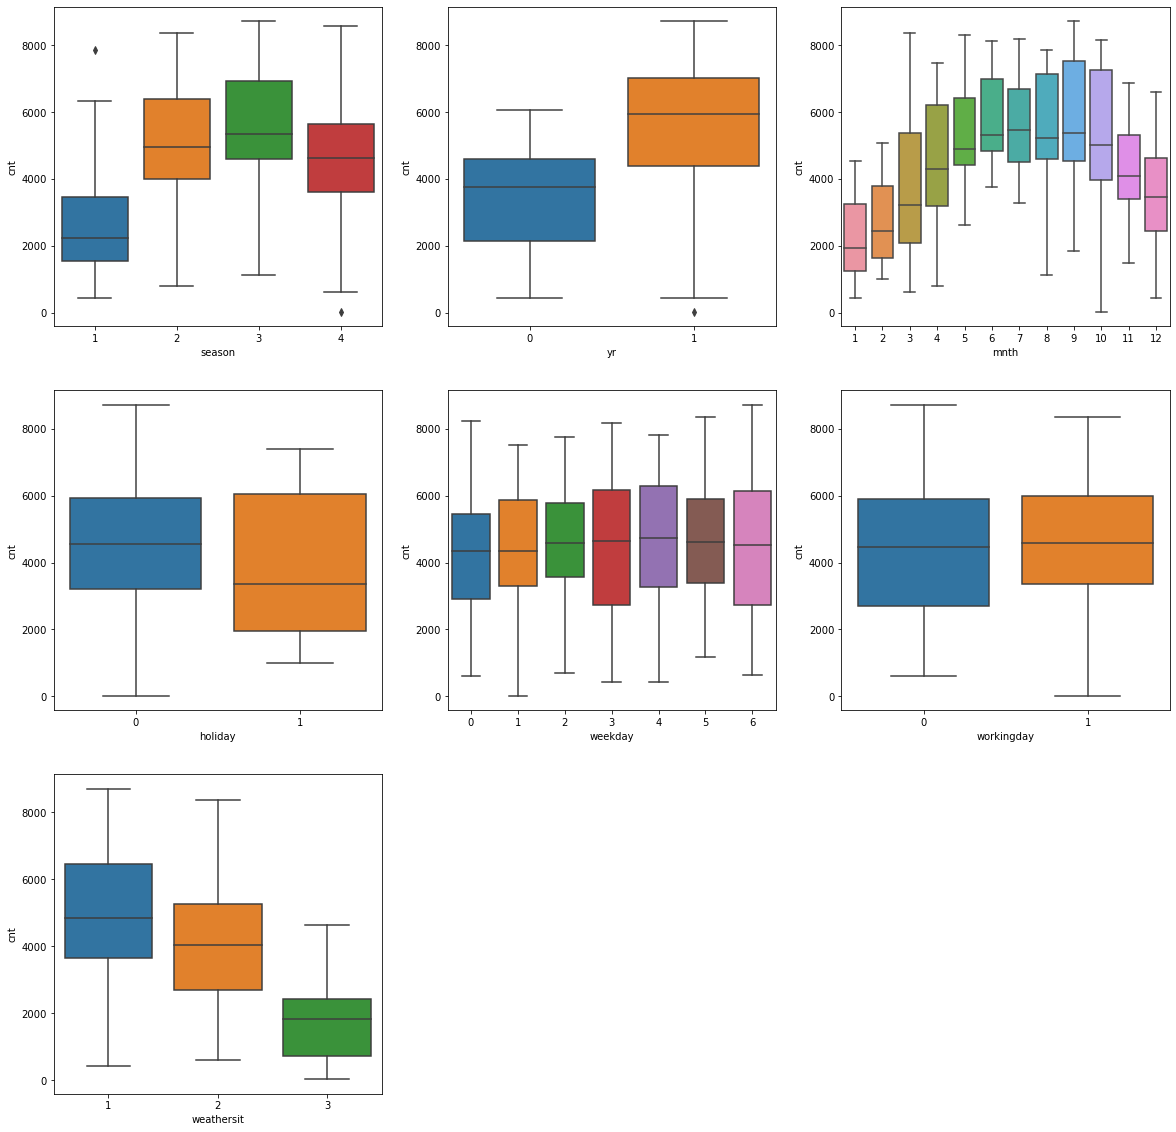

In [64]:
# Plotting categorical variables with cnt

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(data=bike,x='season',y='cnt')

plt.subplot(3,3,2)
sns.boxplot(data=bike,x='yr',y='cnt')

plt.subplot(3,3,3)
sns.boxplot(data=bike,x='mnth',y='cnt')


plt.subplot(3,3,4)
sns.boxplot(data=bike,x='holiday',y='cnt')

plt.subplot(3,3,5)
sns.boxplot(data=bike,x='weekday',y='cnt')


plt.subplot(3,3,6)
sns.boxplot(data=bike,x='workingday',y='cnt')

plt.subplot(3,3,7)
sns.boxplot(data=bike,x='weathersit',y='cnt')

plt.show()

From the above visuals we are getting many insights\
    - Season, year and wether show a good realtion with cnt\
    - weekday and working day does not show any pattern\
    - Month gives a good pattern to visualize\

# Step 2 : Preparing data for modelling

## - Mapping the variable's values

In [65]:
#Encoding season's values
bike["season"]=bike["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})


In [66]:
#Encoding month's values

bike["mnth"]=bike["mnth"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})


In [67]:
#Encoding weekday's values
bike["weekday"]=bike["weekday"].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})


In [68]:
#Encoding weather's values
bike["weathersit"]=bike["weathersit"].map({1:"Clear",2:"Misty_Cloudy",3:"Light_Snowy_Rain",4:"Heavy_Rain"})


In [69]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## - Creating dummy variables

In [70]:
# Creating dummy variables out of indiviual columns
season_df=pd.get_dummies(bike["season"],drop_first=True)
mnth_df=pd.get_dummies(bike["mnth"],drop_first=True)
weekday_df=pd.get_dummies(bike["weekday"],drop_first=True)
weather_df=pd.get_dummies(bike["weathersit"],drop_first=True)

#Concatenating the dummy vars with original bike dataset
bike=pd.concat([bike,season_df,mnth_df,weekday_df,weather_df],axis=1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snowy_Rain,Misty_Cloudy
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Misty_Cloudy,14.110847,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Misty_Cloudy,14.902598,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [71]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light_Snowy_Rain',
       'Misty_Cloudy'],
      dtype='object')

In [72]:
# Dropping redundant variables 
# dropping the original vars of dummy vars and not so useful vars like instant,dteday, casual, registered

bike=bike.drop(['season','mnth','weekday','weathersit','dteday','instant','casual','registered'],axis=1)


In [73]:
bike.shape

(730, 30)

In [74]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snowy_Rain,Misty_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting into train-test

In [75]:
# Splitting in 70/30
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)

In [76]:
print(df_test.shape)
print(df_train.shape)

(220, 30)
(510, 30)


In [77]:
# 1. Instantiate the object
scaler=MinMaxScaler()

# 2. Create a list of numerical vars
num_vars=['temp','atemp','hum','windspeed','cnt']

# 3. Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snowy_Rain,Misty_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [78]:
# Analyzing the train dataset
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


### We observe that min and max values of all the vars is 0 and 1 respectively



# Step 3 : training the model

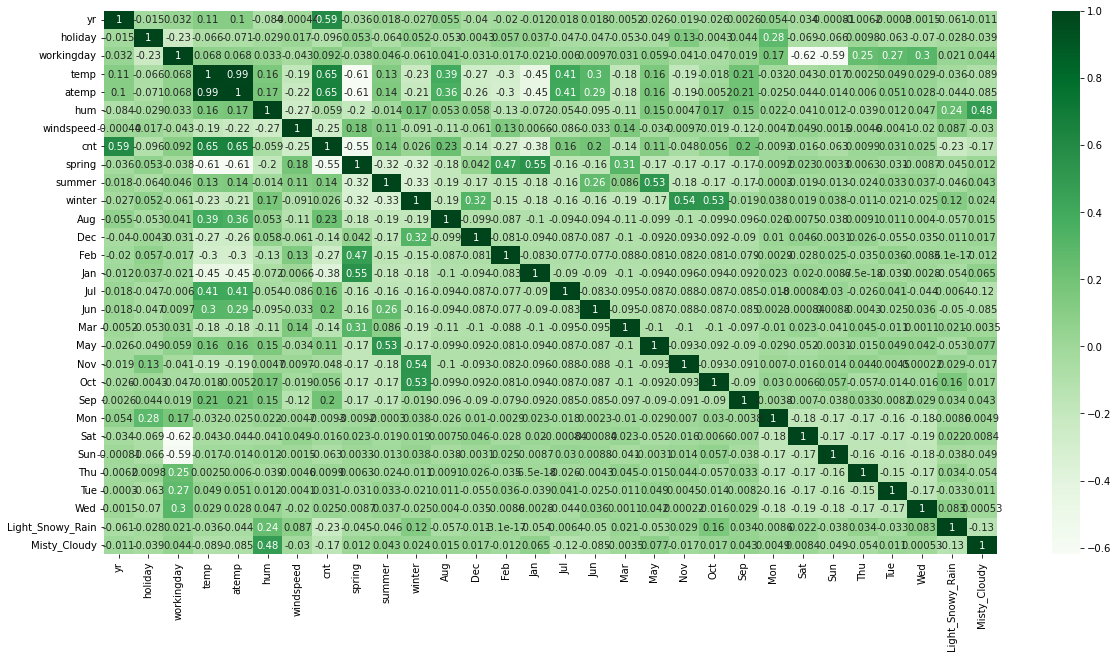

In [79]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens')
plt.show()

In [80]:
# We observe that cnt has positive correlation with year and temp/atemp. 
# Since temp and atemp have very high correlation, we will be using either of them in the model.
# Misty correlated with humidity
# Oct/Nov correlated with winter

In [81]:
# X_train, y_train
y_train=df_train.pop('cnt')
X_train=df_train

We will use **Recursive Feature Elimination method** to select the predictors. We will start with 15 variables

In [82]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [83]:
#List of variables in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light_Snowy_Rain', True, 1),
 ('Misty_Cloudy', True, 1)]

In [84]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Light_Snowy_Rain',
       'Misty_Cloudy'],
      dtype='object')

In [85]:
X_train_rfe = X_train[col]

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Misty_Cloudy,2.29
0,yr,2.09
12,Sat,1.98


In [86]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        08:43:56   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.036  

### By selecting 15 predictors in RFE our model is performing very well with R2 **84.8** & adj R2 84.4.
### We will try to see how the performance changes if we change it to 10 predictors.

In [87]:
# Creating an instance of LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

#Selecting 10 predictors
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Jul',
       'Sep', 'Light_Snowy_Rain'],
      dtype='object')

In [89]:
X_train_rfe = X_train[col]

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,summer,1.76
6,winter,1.68
7,Jul,1.55
8,Sep,1.29
9,Light_Snowy_Rain,1.09
1,holiday,1.04


In [90]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.79e-186
Time:                        08:43:56   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2682      0.026  

### As observed, decreasing the predictors to 10 did not change the accuracy very much. 
### R2 changes from 84.8 to 83.2
We will now drop the variables one by one by looking at p values and VIF

In [91]:
# dropping Jul and calculating VIF an drunning the model again

X_train_rfe=X_train_rfe.drop('Jul',axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,7.11
4,windspeed,3.54
0,yr,2.01
6,winter,1.64
5,summer,1.58
7,Sep,1.20
8,Light_Snowy_Rain,1.09
1,holiday,1.04


In [92]:
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.74e-186
Time:                        08:43:56   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2682      0.026  

In [93]:
# dropping holiday

X_train_rfe=X_train_rfe.drop('holiday',axis=1)

# Calculating VIF after dropping the holiday variable
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.00
1,temp,7.10
3,windspeed,3.52
0,yr,2.01
5,winter,1.64
4,summer,1.58
6,Sep,1.20
7,Light_Snowy_Rain,1.08


In [94]:
# Running the model again after dropping holiday

X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.95e-185
Time:                        08:43:56   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -951.4
Df Residuals:                     501   BIC:                            -913.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2628      0.026  

**All the p values are quite less hence now removing the predictor with high VIF i.e. humidity**

In [95]:
# dropping humidity

X_train_rfe=X_train_rfe.drop('hum',axis=1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.63
2,windspeed,2.95
0,yr,2.00
3,summer,1.55
4,winter,1.34
5,Sep,1.19
6,Light_Snowy_Rain,1.06


In [96]:
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          5.34e-171
Time:                        08:43:56   Log-Likelihood:                 449.48
No. Observations:                 510   AIC:                            -883.0
Df Residuals:                     502   BIC:                            -849.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0839      0.018  

## By removing few variables our final model's R2 comes out to be **80%**. Our final model has 7 predictors.

In [97]:
# getting the coefficients
lm.params

const               0.083854
yr                  0.233690
temp                0.571918
windspeed          -0.147367
summer              0.082444
winter              0.125072
Sep                 0.086771
Light_Snowy_Rain   -0.250231
dtype: float64

In [98]:
# Analyzing the p-values of coefficents
lm.pvalues

const               2.203619e-06
yr                  1.360205e-94
temp                8.287752e-98
windspeed           1.231748e-07
summer              1.014791e-12
winter              2.229929e-25
Sep                 6.686571e-07
Light_Snowy_Rain    3.852676e-19
dtype: float64

#### p values are very very less

In [99]:
y_train_pred=lm.predict(X_train_lm)

# Residual Analysis of train data

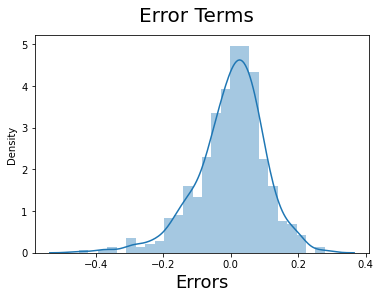

In [100]:
# Calculating residuals by subtracting pred from actuals
res=y_train-y_train_pred

# plot the distribution of error terms
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)
# Give the X-label
plt.xlabel('Errors', fontsize = 18)    
plt.show()

Error terms are normally distributed

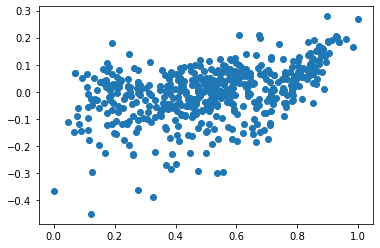

In [101]:
# Checking for any pattern in error terms
plt.scatter(y_train,res)
plt.show()

There is no visible pattern observed in error terms

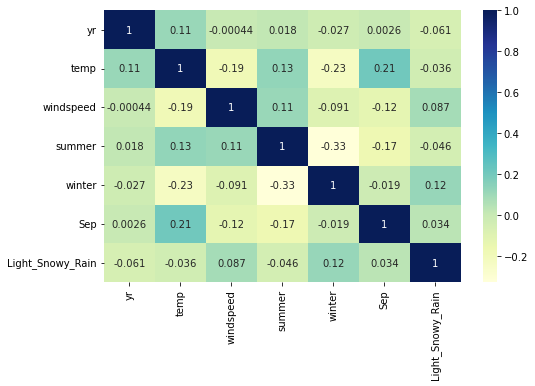

In [102]:
# Checking muticollinearity among independant variables

# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(X_train_rfe.corr(), cmap="YlGnBu", annot=True)
plt.show()

Our model's predictors have very low correlation.

Checking for auto correlation in residuals using durbin watson test

In [103]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(lm.resid)


1.9854780482360455

Value equal or close to 2 says that there is no correlation between residuals and they are independant

# Making Predictions

In [104]:
#Scaling on test data
## 1. Create a list of numerical vars
num_vars=['temp','atemp','hum','windspeed','cnt']

# # 2. Transform on data
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,temp,atemp,hum,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


In [105]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light_Snowy_Rain', 'Misty_Cloudy'],
      dtype='object')

In [106]:
# Analyzing the test data
df_test[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


In [107]:
y_test = df_test.pop('cnt')
X_test = df_test


X_test = X_test[X_train_rfe.columns]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
y_pred_test = lm.predict(X_test_lm)
r2 = r2_score(y_test, y_pred_test)
print(r2)

0.7676656302707388


R2 on test data comes out to be **76.8%** which is good enough.\
Meaning 76.8% of variance is explained by our model.

In [108]:
# getting the columns which are used in the model prediction
col=X_train_rfe.columns

#### Checking the correlations between the final predictor variables

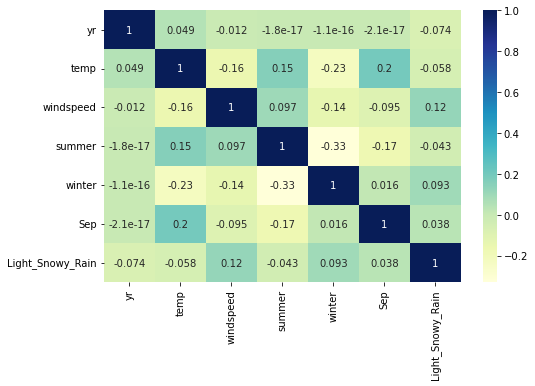

In [109]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike[col].corr(), cmap="YlGnBu", annot=True)
plt.show()

Our model's predictors have very low correlation. \
We can use it to make the prediction of count of bike rentals.

Text(0, 0.5, 'y_pred')

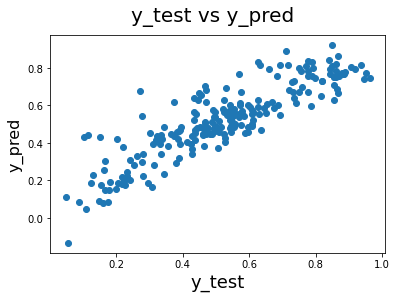

In [110]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

From the above graph it is very clear that our model is working very well on test data as well.

In [111]:
round(lm.params,3)

const               0.084
yr                  0.234
temp                0.572
windspeed          -0.147
summer              0.082
winter              0.125
Sep                 0.087
Light_Snowy_Rain   -0.250
dtype: float64

### Final linear equation

**cnt = 0.084 + (0.234 x yr) + (0.572 x temp) + (-0.147 x windspeed) + (0.082 x summer) + (0.125 x winter) + (0.087 x Sep) + (-0.250 x Light_Snowy_Rain)**